In [36]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

I have selected the FANG. Confusion my erupt from the ticker symbol of Google, which is represented by GOOG and GOOGL on Yahoo finance. The idea is that Class A shares are traded with ticker symbol with GOOGL, whereas class C is traded as GOOG. Class B shares do exist, they just aren't traded publicly. 

In [37]:
tickers = ['FB', 'AAPL', 'NFLX', 'GOOG']
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = 'yahoo', start = '2012-05-18')['Adj Close']

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2029 entries, 2012-05-18 to 2020-06-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      2029 non-null   float64
 1   AAPL    2029 non-null   float64
 2   NFLX    2029 non-null   float64
 3   GOOG    2029 non-null   float64
dtypes: float64(4)
memory usage: 79.3 KB


In [39]:
data.head()

,FB,AAPL,NFLX,GOOG
Date,,,,
2012-05-18,38.230000,65.592659,9.994286,299.078979
2012-05-21,34.029999,69.414101,10.248571,305.908386
2012-05-22,31.000000,68.881065,9.672857,299.278229
2012-05-23,32.000000,70.561768,10.272857,303.592072
2012-05-24,33.029999,69.913734,10.038571,300.702881


In [40]:
data.tail()

,FB,AAPL,NFLX,GOOG
Date,,,,
2020-06-05,230.770004,331.500000,419.600006,1438.390015
2020-06-08,231.399994,333.459991,419.489990,1446.609985
2020-06-09,238.669998,343.989990,434.049988,1456.160034
2020-06-10,236.729996,352.839996,434.480011,1465.849976
2020-06-11,224.429993,335.899994,425.559998,1403.839966


Normalization to 100: To have a common starting point - this is done by dividing stock prices with the starting stock price, the one we wish to represent as 100. So, that every stock's starting price will be 100

(Pt / P0) * 100

Again, I chose May 18,2012, the FB ipo date as the starting date for all the stocks prices. For instance the Ipo dates of 
Apple: December 12, 1980
Google: Aug. 19, 2004
Netflix: May 23, 2002

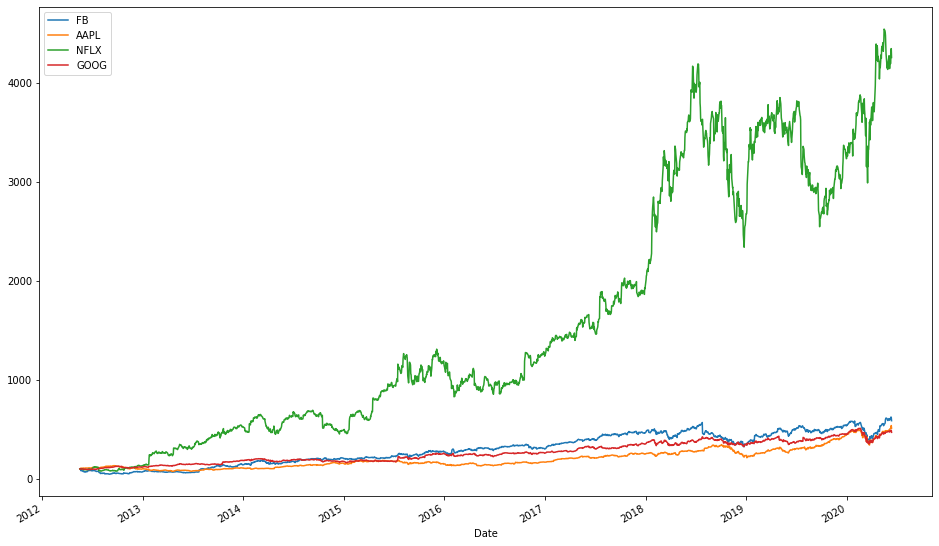

In [41]:
(data / data.iloc[0] * 100).plot(figsize = (16,10))
plt.show()

clearly the Netflix stock price appreciated the highest since 2012. 

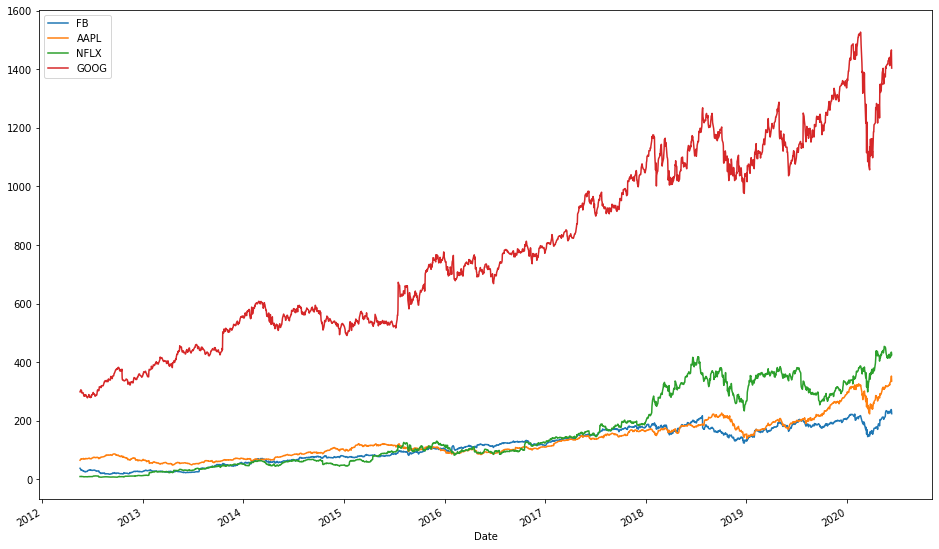

In [42]:
data.plot(figsize=(16,10))
plt.show()
# this script will show how the stock prices have changed

# Return of the Portfolio 

In [43]:
annual_returns = ((data / data.shift(1)) - 1).mean() * 250
annual_returns.head()

FB      0.286493
AAPL    0.239817
NFLX    0.574557
GOOG    0.221897
dtype: float64

In [44]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
# assuming equal 25% weight for the portfolio

In [45]:
np.dot(annual_returns, weights)

0.3306908724259177

In [46]:
portfolio = str(round(np.dot(annual_returns, weights),5)*100) + '%'
portfolio

'33.068999999999996%'

# Portfolio Risk 

### Variance of the Portfolio
this is calculated by the method Weight Transpose matrix * Covariance matrix * Weight matrix
More reference for calculating covariance can be seen in the notebook " calculating risk and return of a security"

In [47]:
portfolio_var = np.dot(weights.T, np.dot(((data / data.shift(1)) - 1).cov() *250, weights))
portfolio_var

0.06249341113115079

### Cleaner way

In [48]:
simple_return = (data / data.shift(1) - 1)
pfolio_var = np.dot(weights.T, np.dot(simple_return.cov() *250, weights))
pfolio_vol = np.dot(weights.T, np.dot(simple_return.cov() *250, weights)) ** 0.5
print(pfolio_vol)
print(pfolio_var)

0.24998682191497773
0.06249341113115079


### Volatility of the Portfolio

In [49]:
portfolio_vol = np.dot(weights.T, np.dot(((data/data.shift(1) - 1).cov() * 250), weights))** 0.5
portfolio_vol

0.24998682191497773

# Diversifiable Risk
this is given by = porfolio variance - weighted annual variances

In [50]:
individual_var = simple_return.var() * 250
individual_var

FB      0.138063
AAPL    0.076526
NFLX    0.229490
GOOG    0.062909
dtype: float64

In [51]:
type(individual_var)

pandas.core.series.Series

### Calculating Diversifiable risk 

In [54]:
dr = pfolio_var - (weights[0]**2 * individual_var[0]) - (weights[1]**2 * individual_var[1]) - (weights[2]**2 * individual_var[2]) - (weights[3]**2 * individual_var[3])
dr

0.030806680999934662

### Calcualting Non-Diversifiable Risk

In [56]:
n_dr = pfolio_var - dr 
n_dr

0.03168673013121613